# `geopandas`

GeoPandas is a Python library that extends `pandas` by adding support for geospatial data.

## Reproducible file paths

In [1]:
import os
import geopandas as gpd
import matplotlib.pyplot as plt

To import data we first use `os` package to create a reproducible file path:

In [4]:
fp = os.path.join('data', 'gbif_sus_scrofa_california', 'gbif_sus_scrofa_california.shp')
fp

'data/gbif_sus_scrofa_california/gbif_sus_scrofa_california.shp'

In [7]:
pigs = gpd.read_file(fp)
pigs.head()

,gbifID,species,state,individual,day,month,year,inst,collection,catalogNum,identified,geometry
0,899953814,Sus scrofa,California,NaN,22.0,3.0,2014.0,iNaturalist,Observations,581956,edwardrooks,POINT (-121.53812 37.08846)
1,899951348,Sus scrofa,California,NaN,9.0,6.0,2007.0,iNaturalist,Observations,576047,Bruce Freeman,POINT (-120.54942 35.47354)
2,896560733,Sus scrofa,California,NaN,20.0,12.0,1937.0,MVZ,Hild,MVZ:Hild:195,"Museum of Vertebrate Zoology, University of Ca...",POINT (-122.27063 37.87610)
3,896559958,Sus scrofa,California,NaN,1.0,4.0,1969.0,MVZ,Hild,MVZ:Hild:1213,"Museum of Vertebrate Zoology, University of Ca...",POINT (-121.82297 38.44543)
4,896559722,Sus scrofa,California,NaN,1.0,1.0,1961.0,MVZ,Hild,MVZ:Hild:1004,"Museum of Vertebrate Zoology, University of Ca...",POINT (-121.74559 38.54882)


In [8]:
fp = os.path.join('data', 'ca_state_boundary', 'ca_state_boundary.shp')
ca_boundary = gpd.read_file(fp)
ca_boundary

,REGION,DIVISION,STATEFP,STATENS,GEOID,STUSPS,NAME,LSAD,MTFCC,FUNCSTAT,ALAND,AWATER,INTPTLAT,INTPTLON,geometry
0,4,9,06,01779778,06,CA,California,00,G4000,A,403501101370,20466718403,+37.1551773,-119.5434183,"MULTIPOLYGON (((-119.63473 33.26545, -119.6363..."


## `GeoSeries` and `GeoDataFrame`

`geopandas.GeoDataFrame` = core structure in geopandas = `pandas.DataFrame` plus a dedicated geometry column that can perform spatial operations.

**geometry column** holds the geometry (points, polygons, etc) of each spatial feature. The type of this columns `geopandas.GeoSeries`.

In [9]:
# Check the data type of the pigs data frame

print(type(pigs))

# Check the data type of the geometry column
print(type(pigs.geometry))

# Check the data type of the gbifID column
print(type(pigs.gbifID))

<class 'geopandas.geodataframe.GeoDataFrame'>
<class 'geopandas.geoseries.GeoSeries'>
<class 'pandas.core.series.Series'>


In [10]:
# Check the data type of each column
pigs.dtypes

gbifID           int64
species         object
state           object
individual     float64
day            float64
month          float64
year           float64
inst            object
collection      object
catalogNum      object
identified      object
geometry      geometry
dtype: object

In [11]:
# Check the type of each element in the geometry column
pigs.geom_type

0       Point
1       Point
2       Point
3       Point
4       Point
        ...  
1041    Point
1042    Point
1043    Point
1044    Point
1045    Point
Length: 1046, dtype: object

What is the geometry type of the single feature in the CA state boundary?

In [12]:
ca_boundary.geom_type

0    MultiPolygon
dtype: object

## CRS

**coordinate reference system (CRS)** = instructions to locate each spatial feature of our data frame on the surface of the Earth.

In [13]:
# Access the CRS of the GeoDataFrame
pigs.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [15]:
# Examine CRS details
print('Ellipsoid:', pigs.crs.ellipsoid)
print('Datum:', pigs.crs.datum)
print('Is geographic?:', pigs.crs.is_geographic)
print('Is projected?:', pigs.crs.is_projected)

Ellipsoid: WGS 84
Datum: World Geodetic System 1984 ensemble
Is geographic?: True
Is projected?: False


In [ ]:
# Obtain the geographic extent of the geo-dataframe (returns in long/lat; xmin, xmax, ymin, ymax)
pigs.total_bounds

array([-124.29448 ,   32.593433, -115.4356  ,   40.934296])

In [19]:
# Examine CRS and extent of california boundary
print('CRS:', ca_boundary.crs, '\n')
print(ca_boundary.total_bounds)

CRS: EPSG:4326 

[-124.48201686   32.52883674 -114.13122248   42.00950827]


In [ ]:
# Ensuring the CRS are the same
pigs.crs == ca_boundary.crs

True

## (Tiniest) Data Wrangling

You can use all your `pandas` data wrangling to wrangle `geopandas.geoDataFrames`.


In [21]:
# Examine pig number by year
pigs['year'].value_counts().sort_index()

year
1818.0     31
1910.0      1
1925.0      1
1927.0      4
1929.0      3
         ... 
2019.0    101
2020.0    159
2021.0    164
2022.0    185
2023.0     98
Name: count, Length: 61, dtype: int64

In [24]:
# Select data from 2020 onwards
pigs_recent = pigs[pigs['year'] >= 2000]

# Check the length of original data frame
print('Total number of observations:', len(pigs))

# Check length of new data frame
print('Number of observations since 2020:', len(pigs_recent))

Total number of observations: 1046
Number of observations since 2020: 915


# Create a map (preliminary)

`gdp.GeoDataFrame` has a `plot()` method that quickly creates a map for our data using the geospatial information.

<Axes: >

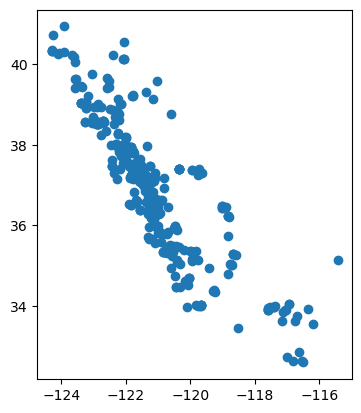

In [25]:
pigs_recent.plot()